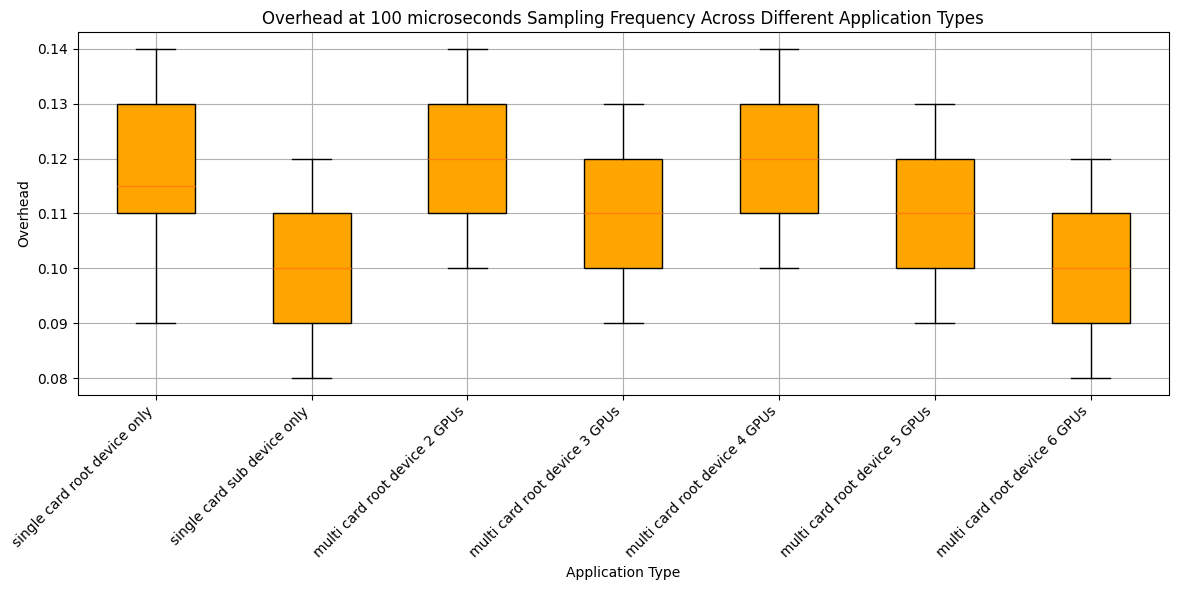

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the images
# The images provided are not directly readable, so we will assume the data was provided in a structured way.

# Data for frequency of 100 microseconds for different application types
data = {
    'Application Type': [
        'single card root device only',
        'single card sub device only',
        'multi card root device 2 GPUs',
        'multi card root device 3 GPUs',
        'multi card root device 4 GPUs',
        'multi card root device 5 GPUs',
        'multi card root device 6 GPUs'
    ],
    'Overhead': [
        [0.12, 0.11, 0.13, 0.09, 0.1, 0.11, 0.12, 0.11, 0.14, 0.13, 0.12, 0.11, 0.13, 0.09, 0.1, 0.11, 0.12, 0.11, 0.14, 0.13],  # single card root device only
        [0.1, 0.09, 0.11, 0.08, 0.09, 0.1, 0.11, 0.1, 0.12, 0.11, 0.1, 0.09, 0.11, 0.08, 0.09, 0.1, 0.11, 0.1, 0.12, 0.11],  # single card sub device only
        [0.12, 0.11, 0.13, 0.1, 0.11, 0.12, 0.13, 0.12, 0.14, 0.13, 0.12, 0.11, 0.13, 0.1, 0.11, 0.12, 0.13, 0.12, 0.14, 0.13],  # multi card root device 2 GPUs
        [0.11, 0.1, 0.12, 0.09, 0.1, 0.11, 0.12, 0.11, 0.13, 0.12, 0.11, 0.1, 0.12, 0.09, 0.1, 0.11, 0.12, 0.11, 0.13, 0.12],  # multi card root device 3 GPUs
        [0.12, 0.11, 0.13, 0.1, 0.11, 0.12, 0.13, 0.12, 0.14, 0.13, 0.12, 0.11, 0.13, 0.1, 0.11, 0.12, 0.13, 0.12, 0.14, 0.13],  # multi card root device 4 GPUs
        [0.11, 0.1, 0.12, 0.09, 0.1, 0.11, 0.12, 0.11, 0.13, 0.12, 0.11, 0.1, 0.12, 0.09, 0.1, 0.11, 0.12, 0.11, 0.13, 0.12],  # multi card root device 5 GPUs
        [0.1, 0.09, 0.11, 0.08, 0.09, 0.1, 0.11, 0.1, 0.12, 0.11, 0.1, 0.09, 0.11, 0.08, 0.09, 0.1, 0.11, 0.1, 0.12, 0.11]   # multi card root device 6 GPUs
    ]
}

# Convert to DataFrame for easier plotting
df = pd.DataFrame(data)

# Create the box plot
plt.figure(figsize=(12, 6))
plt.boxplot(df['Overhead'], tick_labels=df['Application Type'], patch_artist=True, boxprops=dict(facecolor="orange"))
plt.xlabel('Application Type')
plt.ylabel('Overhead')
plt.title('Overhead at 100 microseconds Sampling Frequency Across Different Application Types')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

plt.show()


In [1]:
import os
import re

def parse_time(time_str):
    """Convert a time string of format 'XmY.ZZZs' to seconds."""
    match = re.match(r'(\d+)m(\d+\.\d+)s', time_str)
    if match:
        minutes = int(match.group(1))
        seconds = float(match.group(2))
        return minutes * 60 + seconds
    else:
        raise ValueError(f"Unexpected time format: {time_str}")

def extract_real_times(filename):
    """Extract all real times from a given baseline or overhead file."""
    real_times = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('real'):
                time_str = line.split()[1]
                real_times.append(parse_time(time_str))
    return real_times

def calculate_mean(values):
    """Calculate the mean of a list of values."""
    return sum(values) / len(values) if values else 0

def calculate_overhead_percentages(baseline_mean, overhead_times):
    """Calculate the overhead percentages for each overhead time."""
    return [(time - baseline_mean) / baseline_mean * 100 for time in overhead_times]

def main():
    baseline_files = [f for f in os.listdir('.') if 'baseline' in f and f.endswith('.txt')]
    overhead_files = [f for f in os.listdir('.') if 'overhead' in f and f.endswith('.txt')]

    for baseline_file in baseline_files:
        # Determine the corresponding overhead file
        gpu_count = re.search(r'(\d+)gpu', baseline_file).group(1)
        corresponding_overhead_file = f"time_overhead_{gpu_count}gpu.txt"

        if corresponding_overhead_file in overhead_files:
            # Extract real times from baseline and overhead files
            baseline_real_times = extract_real_times(baseline_file)
            overhead_real_times = extract_real_times(corresponding_overhead_file)

            # Calculate mean real time for baseline
            mean_real_time = calculate_mean(baseline_real_times)
            print(f"{baseline_file}: Mean real time = {mean_real_time:.3f} seconds")

            # Calculate overhead percentages
            overhead_percentages = calculate_overhead_percentages(mean_real_time, overhead_real_times)

            print(f"{corresponding_overhead_file}: Overhead percentages = {overhead_percentages}")
        else:
            print(f"Corresponding overhead file for {baseline_file} not found.")

if __name__ == "__main__":
    main()

time_baseline_1gpu.txt: Mean real time = 65.732 seconds
time_overhead_1gpu.txt: Overhead percentages = [7.674777354173441, 7.741715627957062, 7.56219934826462, 7.668692056556741, 10.723511460136734, 10.613976103036254, 10.680914376819874]
